# <p style="text-align: center;">Heart Disease Classification</p>


## Objectives:
* Analyse the data set
* Define features and a label
* Create different classification models
* Evaluate those models and choose the best one

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectives:" data-toc-modified-id="Objectives:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectives:</a></span></li><li><span><a href="#Import-the-libraries" data-toc-modified-id="Import-the-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import the libraries</a></span></li><li><span><a href="#Get-the-data" data-toc-modified-id="Get-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get the data</a></span></li><li><span><a href="#Getting-first-insights" data-toc-modified-id="Getting-first-insights-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Getting first insights</a></span><ul class="toc-item"><li><span><a href="#Basic-information" data-toc-modified-id="Basic-information-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Basic information</a></span></li><li><span><a href="#Null-values" data-toc-modified-id="Null-values-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Null values</a></span></li><li><span><a href="#Distribution" data-toc-modified-id="Distribution-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Distribution</a></span></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Visualizations</a></span><ul class="toc-item"><li><span><a href="#Men-vs.-women" data-toc-modified-id="Men-vs.-women-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Men vs. women</a></span></li><li><span><a href="#Blood-pressure-among-men-and-women" data-toc-modified-id="Blood-pressure-among-men-and-women-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Blood pressure among men and women</a></span></li><li><span><a href="#Chest-pain-type" data-toc-modified-id="Chest-pain-type-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>Chest pain type</a></span></li><li><span><a href="#Cholesterol" data-toc-modified-id="Cholesterol-4.4.4"><span class="toc-item-num">4.4.4&nbsp;&nbsp;</span>Cholesterol</a></span></li><li><span><a href="#Sugar" data-toc-modified-id="Sugar-4.4.5"><span class="toc-item-num">4.4.5&nbsp;&nbsp;</span>Sugar</a></span></li></ul></li></ul></li><li><span><a href="#Classification" data-toc-modified-id="Classification-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Classification</a></span><ul class="toc-item"><li><span><a href="#Scaling-the-features" data-toc-modified-id="Scaling-the-features-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Scaling the features</a></span></li><li><span><a href="#Split-the-set-into-testing-and-training" data-toc-modified-id="Split-the-set-into-testing-and-training-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Split the set into testing and training</a></span></li><li><span><a href="#K-nearest-neighbour" data-toc-modified-id="K-nearest-neighbour-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>K-nearest neighbour</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Support-vector-machine" data-toc-modified-id="Support-vector-machine-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Support vector machine</a></span></li><li><span><a href="#Decision-tree" data-toc-modified-id="Decision-tree-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Decision tree</a></span></li></ul></li><li><span><a href="#Final-report" data-toc-modified-id="Final-report-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Final report</a></span></li></ul></div>

In this notebook we will try to create a classification model for detecting a possibility of a heart disease.<br> 
The data set was taken from this [source](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) 

To reach our objective, we will follow the classical OSEMN approach

OSEMN Pipeline
* O - Obtaining
* S - Scrubbing
* E - Exploring
* M - Modeling 
* N - INterpreting

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, log_loss, accuracy_score, log_loss
import itertools
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')

## Get the data

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/VladimirNechaev1988/Heart_Disease_Prediction/main/Heart_Disease.csv")
df.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## Getting first insights

### Basic information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

Our data consists of 270 rows and 14 columns. The data is correct and consistent.<br>
Here is a brief explanation:<br>

|    | Variable   | Explanation                                                |
|---:|:-----------|:-----------------------------------------------------------|
|  0 | Age      | Age in years                                      |
|  1 | Sex     | 0 = female, 1 = male|
|  2 | Chest pain type  | 1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic|
|  3 | BP       | Resting blood pressure                    |
|  4 | Cholesterol        | Serum cholesterol in mg/dl                    |
|  5 | FBS over 120       | Fasting blood sugar > 120 mg/dl: 0 = false, 1 = true  |
|  6 | EKG results       | Resting electrocardiographic results: 0 = normal; 1 = abnormality; 2 = hypertrophy|
|  7 | Max HR         | Maximum heart rate achieved  |
|  8 | Exercise angina       | exercise-induced angina: 1 = yes; 0 = no  |
|  9 | ST depression        | ST depression induced by exercise |
| 10 | Slope of ST        | The slope of the peak exercise ST segment: 1: upsloping; 2: flat; 3: downsloping   |
| 11 | Number of vessels fluro      | Number of major vessels (0-3) colored by fluoroscopy|
| 12 | Thallium       | 3 = normal; 6 = fixed defect; 7 = reversable defect |
| 13 | Heart Disease        | Diagnosis of heart disease|

### Null values

In [4]:
df.isnull().any()

Age                        False
Sex                        False
Chest pain type            False
BP                         False
Cholesterol                False
FBS over 120               False
EKG results                False
Max HR                     False
Exercise angina            False
ST depression              False
Slope of ST                False
Number of vessels fluro    False
Thallium                   False
Heart Disease              False
dtype: bool

There are no missing values in the data set

Another way to chech the null values is to plot them:

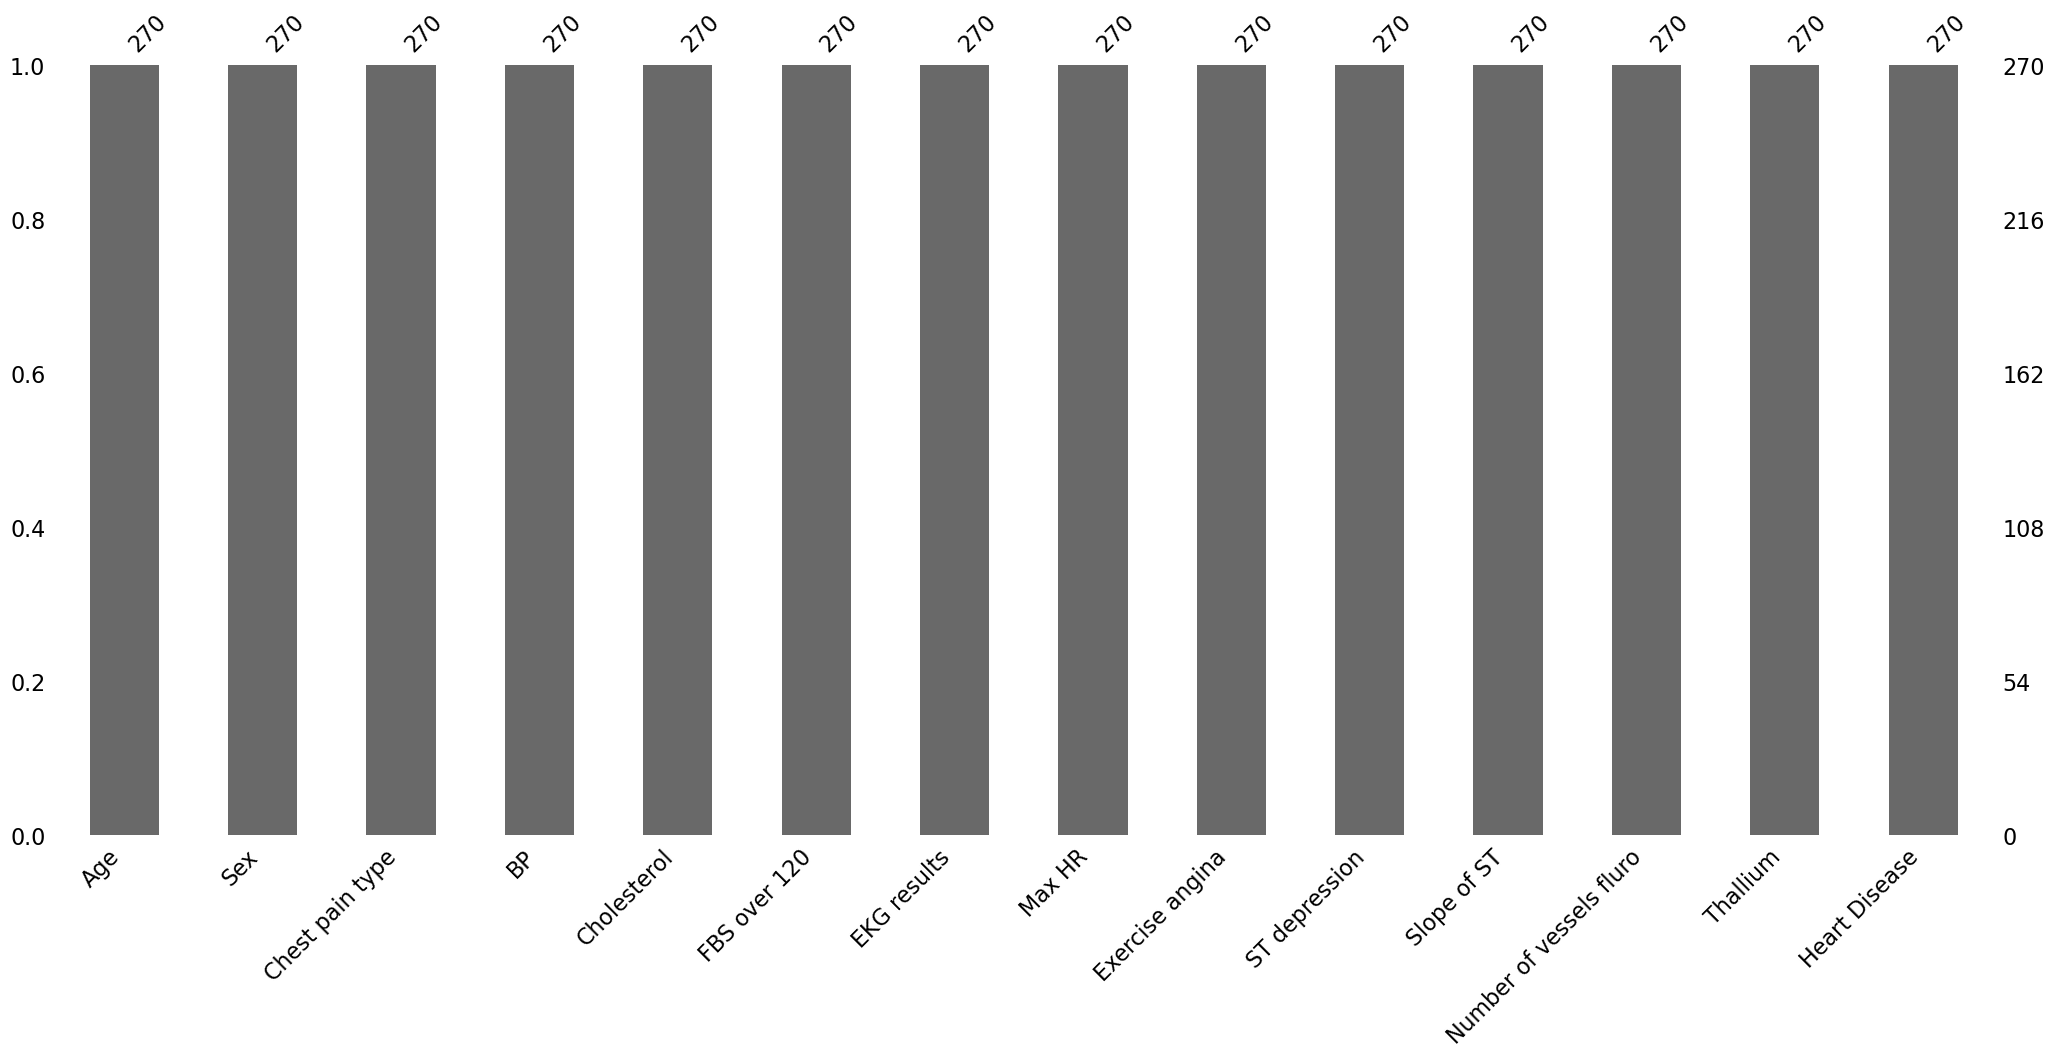

In [5]:
msno.bar(df)
plt.show()

### Distribution

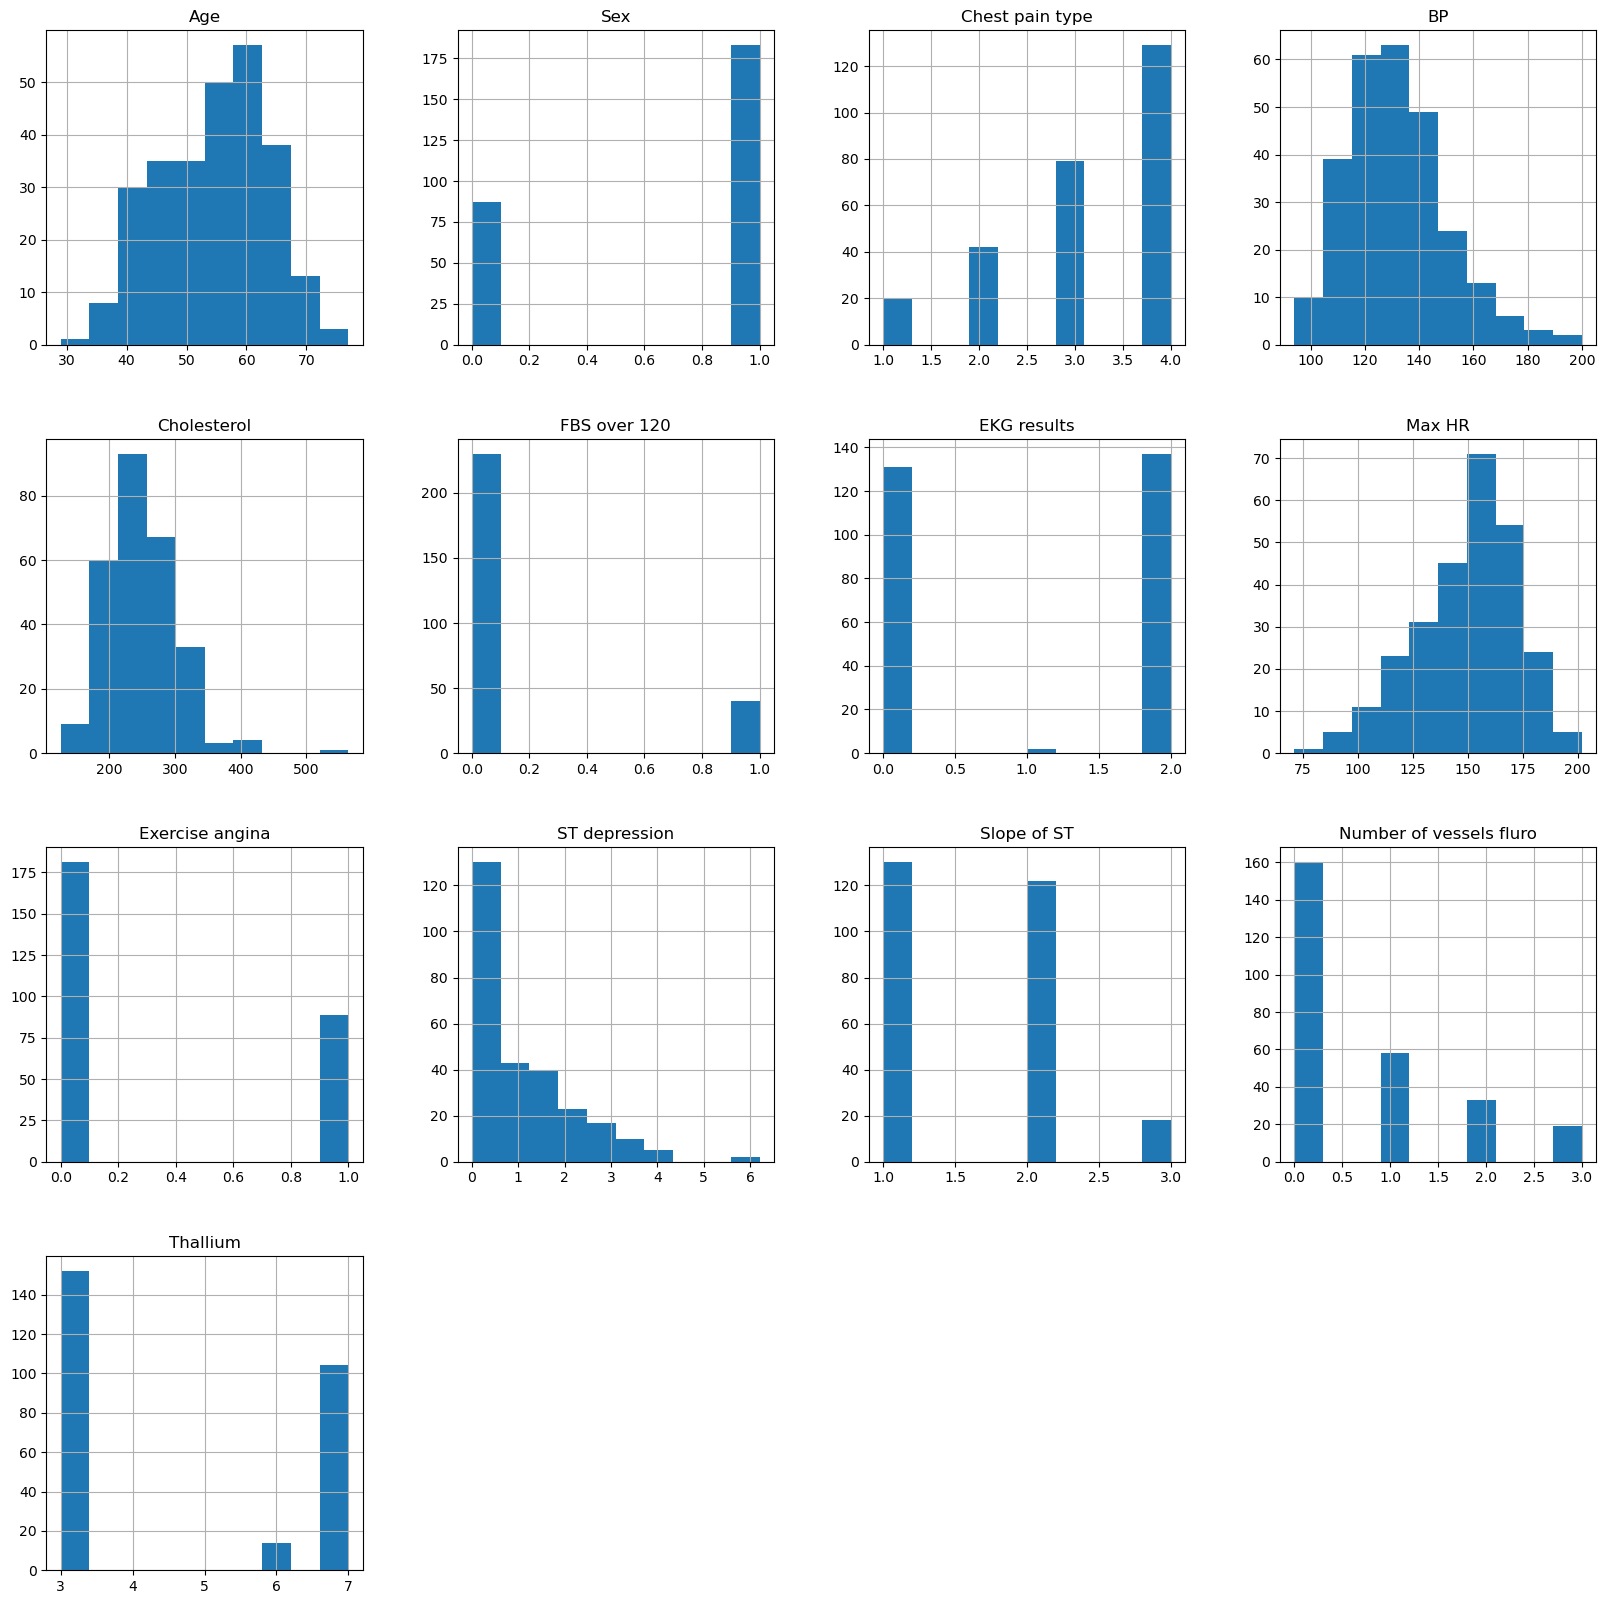

In [6]:
df.hist(figsize=(20, 20))
plt.show()

We have columns with different distributions: <br>

|    | Variable   | Explanation                                                |
|---:|:-----------|:-----------------------------------------------------------|
|  0 | Age      | Normal distribution                                      |
|  1 | Sex     | Binary|
|  2 | Chest pain type  | Four unique values |
|  3 | BP       | Normal, right skew                    |
|  4 | Cholesterol        | Normal, right skew                    |
|  5 | FBS over 120       | Binary  |
|  6 | EKG results       | Three unique values|
|  7 | Max HR         | Normal, left skew  |
|  8 | Exercise angina       | Binary  |
|  9 | ST depression        | Left skew, predominantly values from 0 to 1 |
| 10 | Slope of ST        | Three unique values   |
| 11 | Number of vessels fluro      | Four unique values |
| 12 | Thallium       | Three unqiue values |
| 13 | Heart Disease        | Diagnosis of heart disease|

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


Let's take a look at our target variable and see how many values we have in total

In [8]:
df.describe(include='object')

,Heart Disease
count,270
unique,2
top,Absence
freq,150


Let's view the whole amount of presence or absence of a heart attack

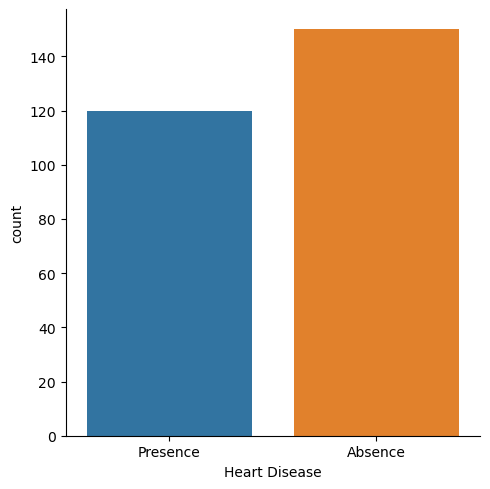

In [9]:
sns.catplot(x='Heart Disease', data=df, kind='count')
plt.show()

Out of 270 total records, 150 are showing the absence of a disease, and 120 - the presence

### Visualizations

The target variable has two unique values: presence and absence, with the latter prevailing ob=ver the first one

Let's create a copy of our data frame and rename some values for a better understanding of our visualizations

In [10]:
df1 = df.copy(deep=True)
df1['Sex'].replace([0, 1], ['Female', 'Male'], inplace=True)
df1['Chest pain type'].replace(
    [1, 2, 3, 4],
    ['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic'],
    inplace=True)
df1['FBS over 120'].replace([0, 1], ['Fasle', 'True'], inplace=True)

df1.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,Male,Asymptomatic,130,322,Fasle,2,109,0,2.4,2,3,3,Presence
1,67,Female,Non-anginal pain,115,564,Fasle,2,160,0,1.6,2,0,7,Absence
2,57,Male,Atypical angina,124,261,Fasle,0,141,0,0.3,1,0,7,Presence
3,64,Male,Asymptomatic,128,263,Fasle,0,105,1,0.2,2,1,7,Absence
4,74,Female,Atypical angina,120,269,Fasle,2,121,1,0.2,1,1,3,Absence


#### Men vs. women

Let's see who is more prone to getting a heart attack, men or women

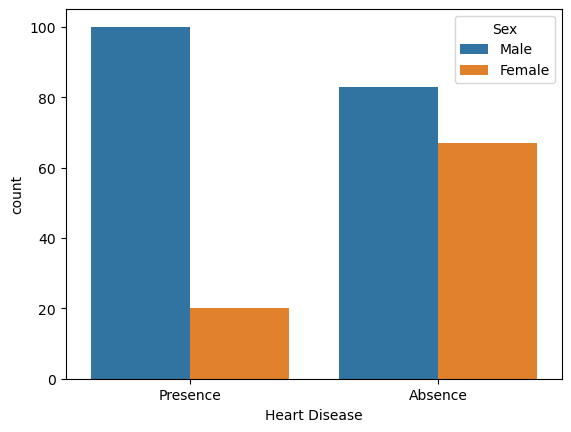

In [11]:
sns.countplot(x='Heart Disease', hue='Sex', data=df1)
plt.show()

#### Blood pressure among men and women

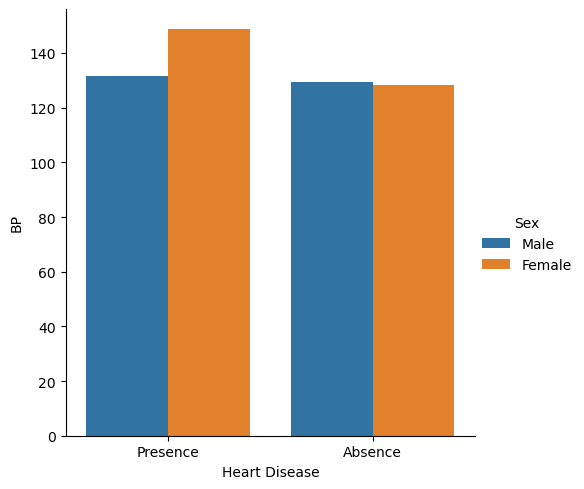

In [12]:
sns.catplot(x='Heart Disease',
            y='BP',
            hue='Sex',
            data=df1,
            kind='bar',
            ci=None)
plt.show()

Boxplot for a better understanding

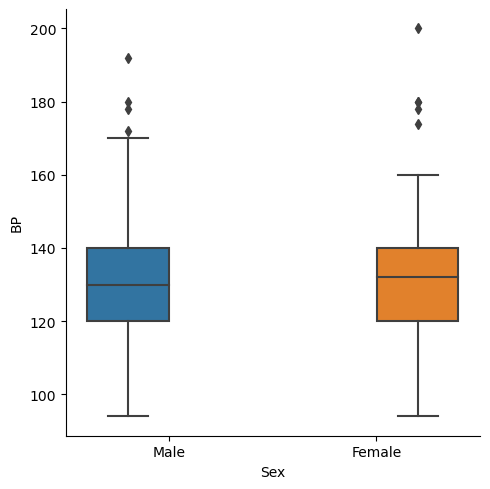

In [13]:
sns.catplot(x='Sex', y='BP', hue='Sex', kind='box', data=df1, ci=None)
plt.show()

We can see that men and women have aproximately the equal distribution of blood pressure with several higher outliers.<br> There is a greater number of women suffering from heart diseases having a higher blood pressure

#### Chest pain type

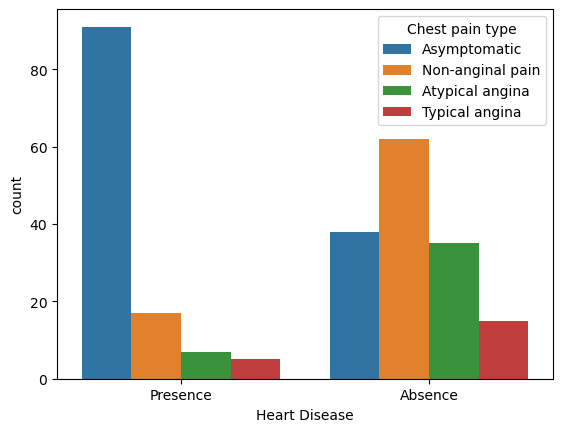

In [14]:
sns.countplot(x='Heart Disease', hue='Chest pain type', data=df1)
plt.show()

Most people suffering from heart disease had an assyptomatic chest pain type

#### Cholesterol

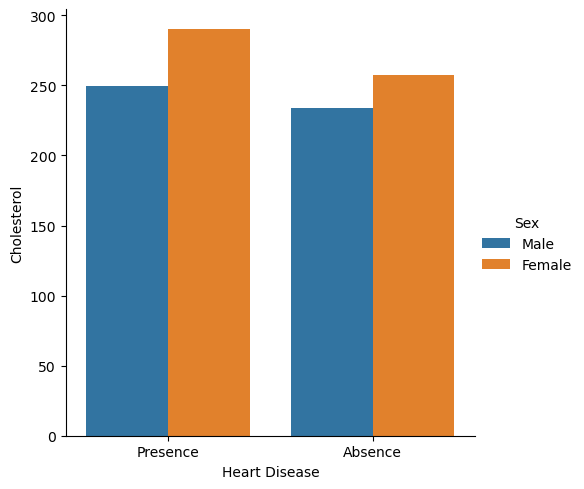

In [15]:
sns.catplot(x='Heart Disease',
            y='Cholesterol',
            hue='Sex',
            kind='bar',
            data=df1,
            ci=None)
plt.show()

Cholesterol level is visibly higher among women.<br>
People with heart diseases have higher level of cholesterol

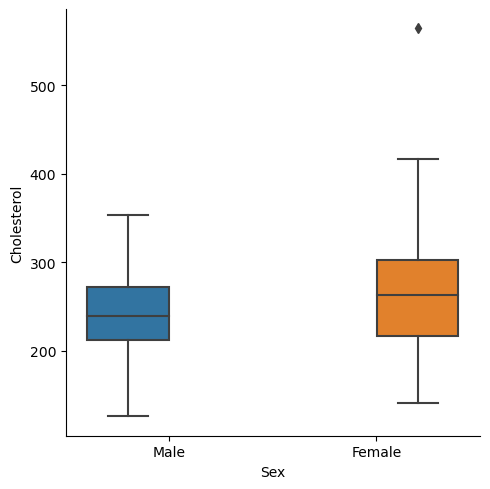

In [16]:
sns.catplot(x='Sex', y='Cholesterol', hue='Sex', kind='box', data=df1)
plt.show()

The box plot demonstrates better that women have a higher level of cholesterol

#### Sugar

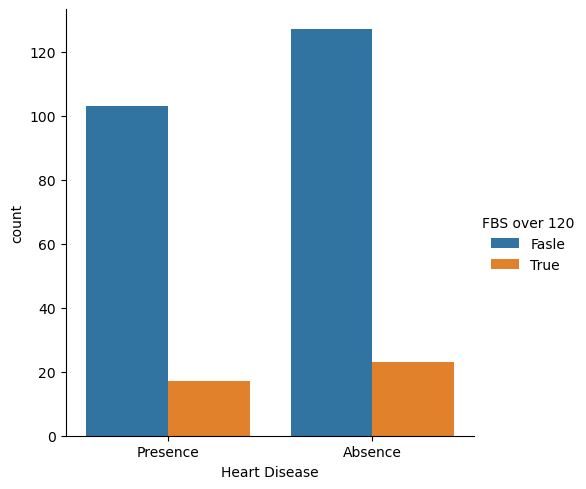

In [17]:
sns.catplot(x='Heart Disease',
            hue='FBS over 120',
            kind='count',
            data=df1,
            ci=None)
plt.show()

Most people do not have high level of blood sugar. The number of those who have a heart disease and a high level of sugar is quite small

## Classification

Ok, now we have a complete overview of our data and can proceed to the modelling. <br>
Since we are having binary label value, we will be working with a supervised learnig called classification.<br>

We cannot fit a regression line in this case, hence we will consider such classification options as KNN, logistic regression, SVM and decision tree

### Scaling the features

In order to work with our classification, we will scale the features data using a standard scaler

In [18]:
cols = df.columns.tolist()
cols.remove("Heart Disease")
scale_X = StandardScaler()
X = pd.DataFrame(scale_X.fit_transform(df.drop(["Heart Disease"], axis=1), ),
                 columns=cols)

This is our feature set:

In [19]:
X.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,1.712094,0.689500,0.870928,-0.075410,1.402212,-0.417029,0.981664,-1.759208,-0.701222,1.181012,0.676419,2.472682,-0.875706
1,1.382140,-1.450327,-0.183559,-0.916759,6.093004,-0.417029,0.981664,0.446409,-0.701222,0.481153,0.676419,-0.711535,1.189277
2,0.282294,0.689500,-1.238045,-0.411950,0.219823,-0.417029,-1.026285,-0.375291,-0.701222,-0.656118,-0.954234,-0.711535,1.189277
3,1.052186,0.689500,0.870928,-0.187590,0.258589,-0.417029,-1.026285,-1.932198,1.426081,-0.743600,0.676419,0.349871,1.189277
4,2.152032,-1.450327,-1.238045,-0.636310,0.374890,-0.417029,0.981664,-1.240239,1.426081,-0.743600,-0.954234,0.349871,-0.875706


And this is our prediction variable

In [20]:
y = df['Heart Disease']
y.head()

0    Presence
1     Absence
2    Presence
3     Absence
4     Absence
Name: Heart Disease, dtype: object

### Split the set into testing and training

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (216, 13) (216,)
Test set: (54, 13) (54,)


### K-nearest neighbour

Let''s create the model with k = 2 and see it's prediction power

Create an instance

In [22]:
k = 2
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

Let's see the predictions on the test set

In [23]:
yhat_knn = neigh.predict(X_test)
yhat_knn[0:5]

array(['Absence', 'Presence', 'Absence', 'Presence', 'Presence'],
      dtype=object)

In order to make an evaluation, we will create a confusion matrix plotting function

In [24]:
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
  
    """

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,
                 i,
                 format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Let's visualize our matrix.<br>
First, we will create it with a sklearn function and then plot it

[[14 14]
 [ 2 24]]


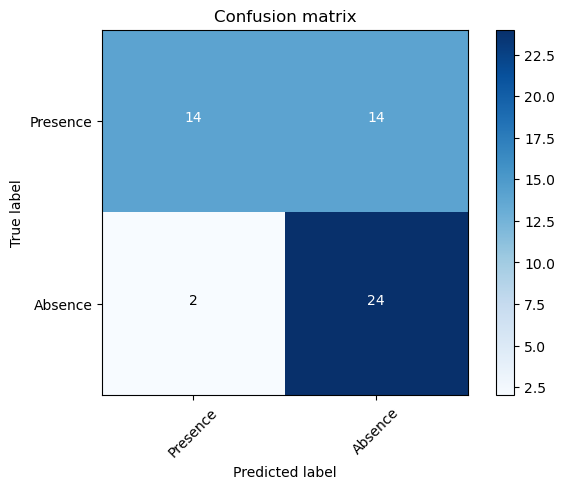

In [25]:
cnf_matrix = confusion_matrix(y_test, yhat_knn, labels=['Presence', 'Absence'])

plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=['Presence', 'Absence'],
                      normalize=False,
                      title='Confusion matrix')

We can observe 14 true positive and 24 true negative values, which are the correct predictions<br>
14 false positive values are the type I error - this is a bad kind of error as 14 people might actually have a heart disease but the model put them in a "healthy" basket<br>
2 false negative values are type II error which is people being wrongfully diagnosed while being in fact healthy

Lastly, we may print out the report:

In [26]:
print(classification_report(y_test, yhat_knn))

              precision    recall  f1-score   support

     Absence       0.63      0.92      0.75        26
    Presence       0.88      0.50      0.64        28

    accuracy                           0.70        54
   macro avg       0.75      0.71      0.69        54
weighted avg       0.76      0.70      0.69        54



### Logistic regression

We will use a GridSearch to define the best solver for the logistic regression

In [27]:
parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]
LR = LogisticRegression()
Grid = GridSearchCV(LR, parameters, cv=5)
Grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}])

In [28]:
Best_LR=Grid.best_estimator_
Best_LR

LogisticRegression(solver='newton-cg')

Our Grid search defined newton-cg as the best solver<br>
Now let's create our model

In [29]:
LR = LogisticRegression(solver='newton-cg', random_state=2).fit(X_train, y_train)

See the predictions

In [30]:
yhat_lr = LR.predict(X_test)
yhat_lr[:5]

array(['Absence', 'Presence', 'Absence', 'Presence', 'Presence'],
      dtype=object)

**predict_proba** returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

In [31]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:5]

array([[0.98935193, 0.01064807],
       [0.09890698, 0.90109302],
       [0.99670418, 0.00329582],
       [0.43290349, 0.56709651],
       [0.01145906, 0.98854094]])

We will use the same methods for evaluating our model

[[17 11]
 [ 4 22]]


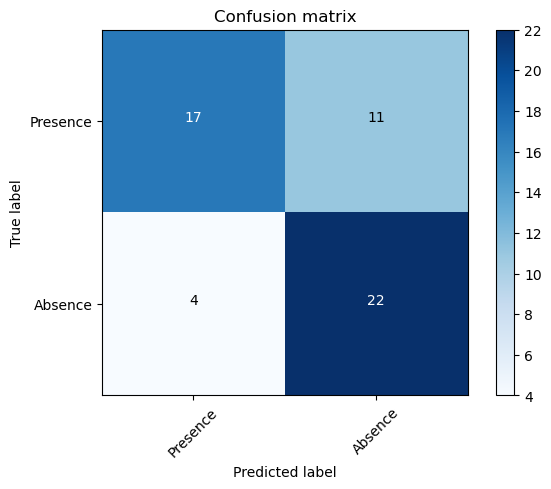

In [32]:
cnf_matrix = confusion_matrix(y_test, yhat_lr, labels=['Presence', 'Absence'])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=['Presence', 'Absence'],
                      normalize=False,
                      title='Confusion matrix')

We observe 17 true positive and 22 true negative values, which are the correct predictions<br>
11 false positive values are the type I error - this is a bad kind of error as 11 people might actually have a heart disease but the model put them in a "healthy" basket<br>
4 false negative values are type II error which is people being wrongfully diagnosed while being in fact healthy

Let's check the report

In [33]:
print(classification_report(y_test, yhat_lr))

              precision    recall  f1-score   support

     Absence       0.67      0.85      0.75        26
    Presence       0.81      0.61      0.69        28

    accuracy                           0.72        54
   macro avg       0.74      0.73      0.72        54
weighted avg       0.74      0.72      0.72        54



For the logistic regression, we may as well check the log loss

In [34]:
log_loss(y_test, yhat_prob)

0.6911105157563048

### Support vector machine

Create the instace and fit the model

In [35]:
clf = svm.SVC(kernel='rbf', probability=True, random_state=2)
clf.fit(X_train, y_train)

SVC(probability=True, random_state=2)

In [36]:
yhat_svm = clf.predict(X_test)
yhat_svm[0:5]

array(['Absence', 'Presence', 'Absence', 'Absence', 'Presence'],
      dtype=object)

[[18 10]
 [ 3 23]]


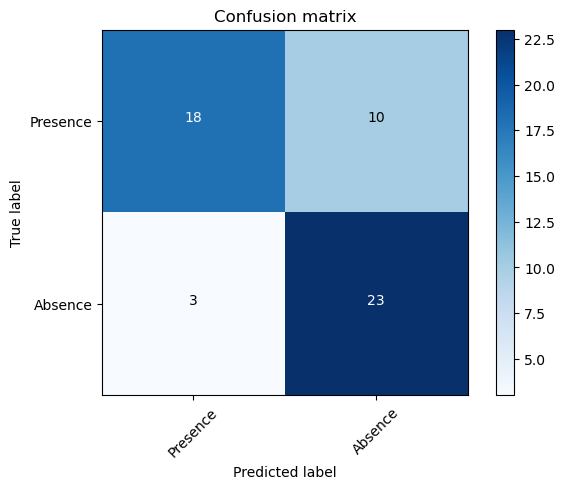

In [37]:
cnf_matrix = confusion_matrix(y_test, yhat_svm, labels=['Presence', 'Absence'])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=['Presence', 'Absence'],
                      normalize=False,
                      title='Confusion matrix')

We observe 18 true positive and 23 true negative values, which are the correct predictions<br>
10 false positive values are the type I error - this is a bad kind of error as 10 people might actually have a heart disease but the model put them in a "healthy" basket<br>
3 false negative values are type II error which is people being wrongfully diagnosed while being in fact healthy

In [38]:
print(classification_report(y_test, yhat_svm))

              precision    recall  f1-score   support

     Absence       0.70      0.88      0.78        26
    Presence       0.86      0.64      0.73        28

    accuracy                           0.76        54
   macro avg       0.78      0.76      0.76        54
weighted avg       0.78      0.76      0.76        54



### Decision tree 

Create an instance and fit

In [39]:
HeartTree = DecisionTreeClassifier(criterion="gini",
                                   max_depth=4,
                                   random_state=2)
HeartTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=2)

Predict

In [40]:
predTree = HeartTree.predict(X_test)
predTree[:5]

array(['Absence', 'Presence', 'Absence', 'Absence', 'Presence'],
      dtype=object)

Evaluate using the confusion matrix

[[17 11]
 [ 3 23]]


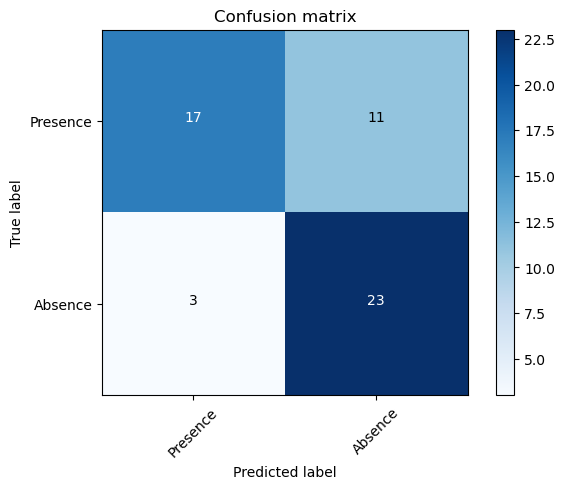

In [41]:
cnf_matrix = confusion_matrix(y_test, predTree, labels=['Presence', 'Absence'])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=['Presence', 'Absence'],
                      normalize=False,
                      title='Confusion matrix')

We observe 17 true positive and 23 true negative values, which are the correct predictions<br>
11 false positive values are the type I error - this is a bad kind of error as 11 people might actually have a heart disease but the model put them in a "healthy" basket<br>
3 false negative values are type II error which is people being wrongfully diagnosed while being in fact healthy

Finally, the report:

In [42]:
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

     Absence       0.68      0.88      0.77        26
    Presence       0.85      0.61      0.71        28

    accuracy                           0.74        54
   macro avg       0.76      0.75      0.74        54
weighted avg       0.77      0.74      0.74        54



We can as well visualize our tree:

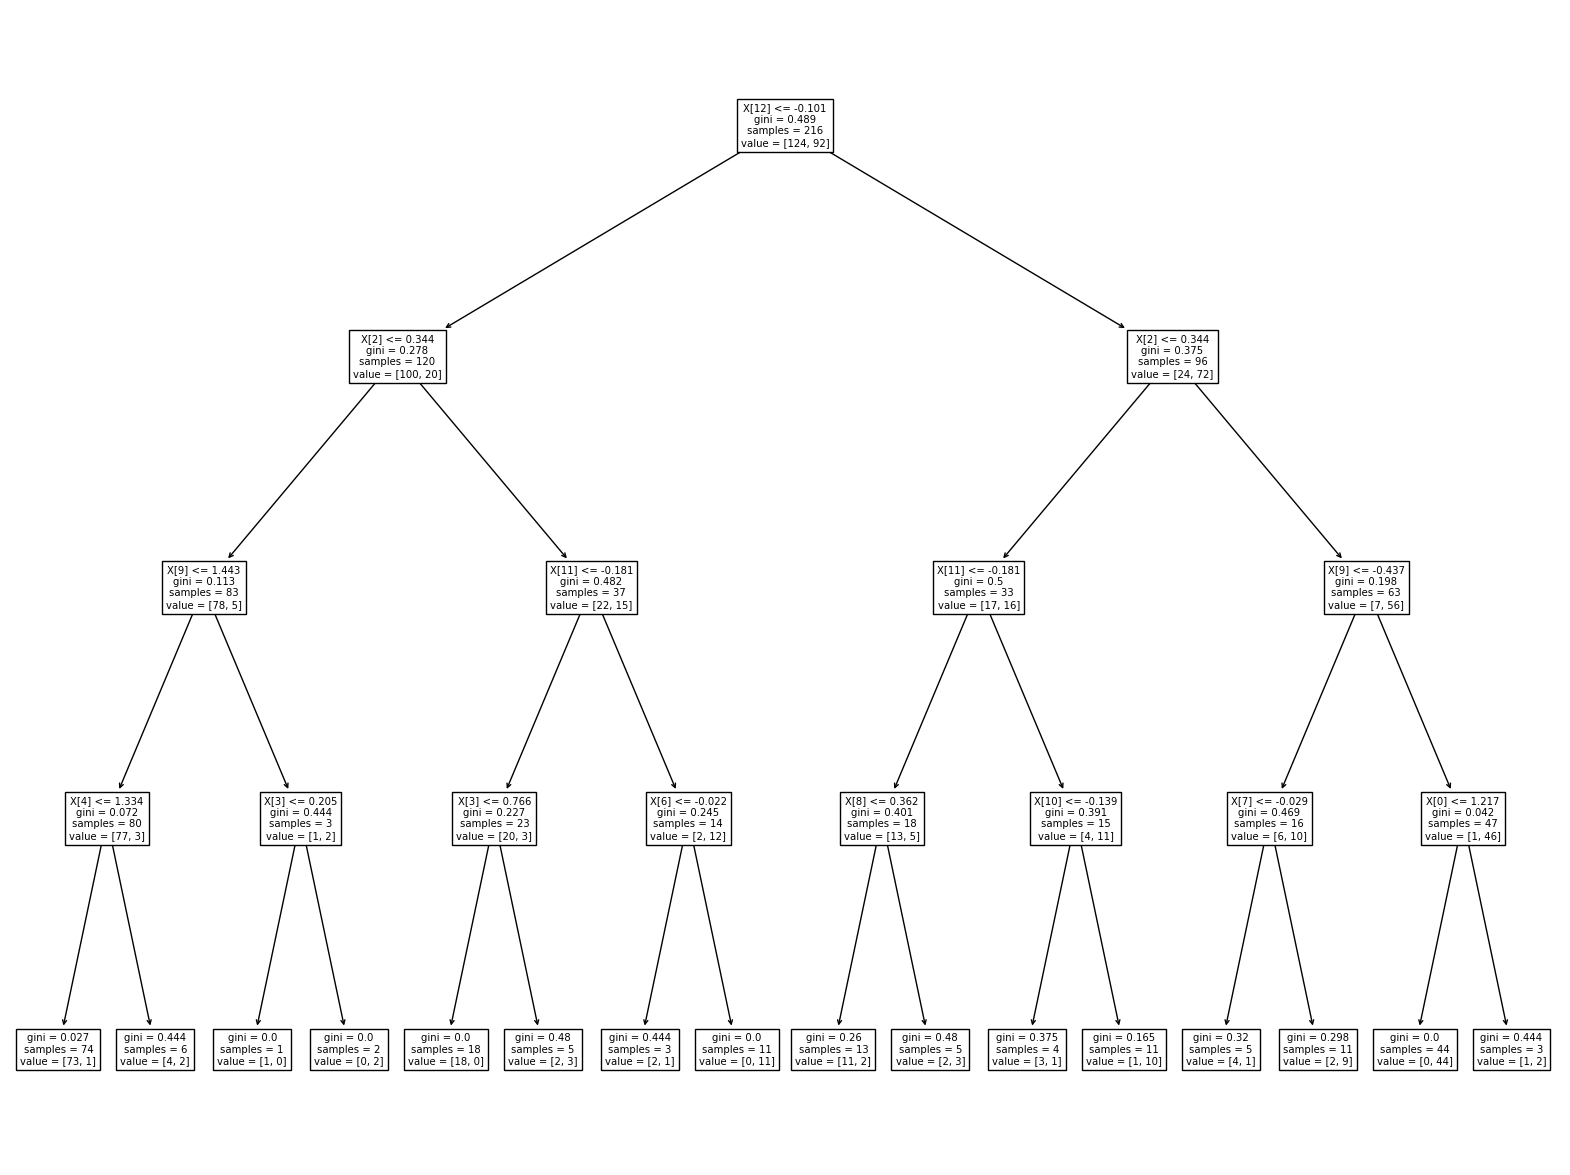

In [43]:
plt.figure(figsize=(20, 15))

tree.plot_tree(HeartTree)
plt.show()

## Final report

| Algorithm          |Accuracy | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.70    | 0.69     | NA      |
| Decision Tree      | 0.74    | 0.74     | NA      |
| SVM                | 0.76    | 0.76     | NA      |
| LogisticRegression | 0.72    | 0.72     | 0.69    |

According to the final report, SVM algorith showed the best prediction accuracy with minimal false positive and false negative values.